# Project Title
**Exploring Salary Trends and Industry Variances: A Study of the Ask a Manager Salary Survey (2021)**

## Project Overview
In this data analysis project, we aim to investigate salary trends and variations within distinct industries utilizing the "Ask a Manager Salary Survey" dataset from 2021. By analyzing salary distributions, calculating averages, and understanding the spread of compensation within each industry, we seek to provide insights into the factors influencing salaries across different professional sectors. This exploration will help professionals and organizations gain a deeper understanding of the competitive landscape and compensation benchmarks within their respective industries.

## Project Goals
1. **Industry Salary Benchmarking**
   - *Objective:* To determine the industry that offers the highest average salary based on the "Ask a Manager Salary Survey" data from 2021.
   - *Method:* Analyze the dataset to calculate and compare average salaries across various industries, identifying the industry with the highest average compensation.


2. **Salary Growth with Experience Analysis**
   - *Objective:* To understand the relationship between years of experience and salary growth for professionals in different job titles.
   - *Method:* Conduct a thorough analysis to quantify and visualize how salary increases with years of experience across different job titles and industries.

3. **Geographic Salary Comparison**
   - *Objective:* To compare salaries for the same job role in different locations and identify regions offering the highest compensation.
   - *Method:* Analyze the dataset to determine salary variations for identical job titles across diverse geographic locations, providing a comparative analysis.

4. **Salary Disparities Analysis by Gender and Experience**
   - *Objective:* To assess how salaries differ by gender and years of experience within the same job roles.
   - *Method:* Conduct a detailed analysis of the dataset to calculate gender-based salary disparities considering years of experience, highlighting any significant differences.

5. **Factors Influencing Total Work Experience vs Field Experience**
   - *Objective:* To determine the optimal balance of total work experience and years in a specific field that corresponds to higher salaries.
   - *Method:* Analyze the dataset to identify the "sweet spot" in terms of total work experience vs years in the specific field that maximizes compensation considering industry trends.

## Methodology:
- Data will be cleaned and preprocessed to handle missing values or outliers.
- Visualizations such as line charts, bar plots, and correlation matrices will be used to illustrate trends, relationships, and statistics.
- Python libraries like Pandas, Matplotlib, Seaborn, and NumPy will be employed for data manipulation, visualization, and analysis.

In [1]:
# importing modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
# reading dataset
salary_df = pd.read_csv('C:/Users/BellaRosa/Desktop/Data Analysis/Projects/Salary Data Analysis/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv')

In [3]:
salary_df.shape

(27976, 18)

In [4]:
salary_df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


<p> Looks like the Column names are too verbose and might pose an issue during data cleaning and data analysis, we should rename the columns before we proceed</p>

In [5]:
salary_df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [6]:
salary_df.rename(columns= {'How old are you?':'Age','What industry do you work in?':'Industry',
                  'If your job title needs additional context, please clarify here:':'Job_Context',
                  """What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)""" : 'Annual_Salary', 
                 """How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.""":'Bonuses',
                 'Please indicate the currency':'Currency', 'What country do you work in?':'Country',"""If you're in the U.S., what state do you work in?""":
                 'State(USA)','How many years of professional work experience do you have overall?':'YOE(Overall)','How many years of professional work experience do you have in your field?':
                 'YOE(Field)', 'What is your highest level of education completed?':'Edu_Level_Highest', 'What is your gender?':'Gender','What is your race? (Choose all that apply.)':
                  'Race','What city do you work in?':'City'}, inplace=True)

In [7]:
# Drop unneeded colums
salary_df.drop(columns=['If "Other," please indicate the currency here: ','If your income needs additional context, please provide it here:','Job_Context','Timestamp'],
              inplace=True)

In [8]:
salary_df.tail()

,Age,Industry,Job title,Annual_Salary,Bonuses,Currency,Country,State(USA),City,YOE(Overall),YOE(Field),Edu_Level_Highest,Gender,Race
27971,25-34,Computing or Tech,Data scientist,500,NaN,USD,Ghana,NaN,Accra,2 - 4 years,2 - 4 years,College degree,Man,Black or African American
27972,under 18,"Accounting, Banking & Finance",McDonalds Crew Member,40000,NaN,USD,USA,Minnesota,NaN,1 year or less,1 year or less,High School,Woman,Asian or Asian American
27973,45-54,"Marketing, Advertising & PR",marketing designer,18000,3600.0,EUR,Spain,NaN,Palma de mallorca,11 - 20 years,5-7 years,Some college,Man,NaN
27974,25-34,Education (Higher Education),student,35000,NaN,USD,pakistan,NaN,karachi,2 - 4 years,1 year or less,High School,Man,Asian or Asian American
27975,18-24,Computing or Tech,intern,35000,0.0,USD,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Man,Asian or Asian American


In [9]:
salary_df.dtypes

Age                   object
Industry              object
Job title             object
Annual_Salary         object
Bonuses              float64
Currency              object
Country               object
State(USA)            object
City                  object
YOE(Overall)          object
YOE(Field)            object
Edu_Level_Highest     object
Gender                object
Race                  object
dtype: object

In [10]:
# check for duplicate rows
print(salary_df.duplicated().sum())

153


In [11]:
# Check for null values
print(salary_df.isnull().sum())

Age                     0
Industry               72
Job title               0
Annual_Salary           0
Bonuses              7268
Currency                0
Country                 0
State(USA)           4993
City                   80
YOE(Overall)            0
YOE(Field)              0
Edu_Level_Highest     215
Gender                167
Race                  170
dtype: int64


In [12]:
# Begin to drop or clean columns with null values
salary_df.dropna(subset=['Industry', 'Race', 'Gender','City', 'Race'], inplace=True)

In [13]:
# Fill null values
salary_df['State(USA)'] = salary_df['State(USA)'].fillna('Not in USA')
salary_df['Bonuses'] = salary_df['Bonuses'].fillna(0)
salary_df['Edu_Level_Highest'] = salary_df['Edu_Level_Highest'].fillna('No Formal Education')

In [14]:
# final null check
salary_df.reset_index(drop=True, inplace=True)
print(salary_df.isnull().sum())

Age                  0
Industry             0
Job title            0
Annual_Salary        0
Bonuses              0
Currency             0
Country              0
State(USA)           0
City                 0
YOE(Overall)         0
YOE(Field)           0
Edu_Level_Highest    0
Gender               0
Race                 0
dtype: int64


In [15]:
# Convert data types
salary_df['Annual_Salary'] = salary_df['Annual_Salary'].str.replace(',','')
salary_df.Annual_Salary = salary_df.Annual_Salary.astype('float')

In [16]:
# Cleaning the rows
salary_df['Country'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'us', 'Usa',
       'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'Spain', 'England ', 'united states of america',
       'Ireland ', 'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

<p>As we can see the Countries Column is Filled with several irregular values, so we must first normalize all the values within it</p>

In [17]:
# first we remove the whitespace from every value
salary_df['Country']= salary_df['Country'].str.replace('.','')
salary_df['Country'] = salary_df['Country'].str.lstrip(' ')
salary_df['Country'] = salary_df['Country'].str.rstrip(' ')

In [18]:
# Create a list with every possible variation of the Countries in the list
usa_variations = [
    'United States', 'United States of America', 'United States- Puerto Rico',
    'United States of America', 'United Statesp', 'United Stattes', 'United Statea',
    'United Statees', 'United Stares', 'United Stateds', 'United Statew', 'United Status',
    'United Statez', 'UNITED STATES', 'United statew', 'united states', 'united states of america',
    'united stated', 'united statesp', 'Unted States', 'UNited States','Us',
    'Untied States', 'United Stated', 'Unted States', 'UNited States', 'UNited States', 'Unted States',
    'United States Of America', 'United States is America', 'United States-- Virgin Islands',
    'US of A', 'US', 'us', 'Usa', 'uSA', 'uS', 'USD', 'UsA', 'USAB', 'USaa','USA tomorrow','USD',
    'United STates', 'USaa', 'uSA',  'United Stateds','USA-- Virgin Islands','United states of america',
    'Unitef Stated','Unitied States','UnitedStates','USS', 'Uniteed States',
    'United States (I work from home and my clients are all over the US/Canada/PR','United Statss','The US',
    'Uniter Statez','For the United States government, but posted overseas','United Sttes','United states of America','america',
    'California', 'San Francisco', 'Usat', '🇺🇸', 'Virginia','Unites states', 'Unite States','United States of america',' United States', 'United Statues',
    'The United States', 'United State of America','Uniyed states', 'Uniyes States', 'United States of Americas', 'United Statws','US ', 'US>',
    'America','United States of American ','united States','Unites States ','United Sates','United states of America ','usa','USA', 'usa', 'United States', 'United states', 'united states', 'US', 'Us', 'U S', 'U S ', 'US ', 'United States of America', 'United States of america', 'United States ', 
    'Uniited States', 'Unites States', 'Unites states', 'United states', 'United y', 'United  States', 'USA tomorrow', 'USA ','USA', 'usa', 'United states ', 'US', 'Us', 'U S', 'U S ', 'US ', 'United States of America ', 'ISA', 'United State', 'US ', 'usa ', 'Unites states ',
    'USA (company is based in a US territory, I work remote)', 'USA tomorrow ', 'us ','United Sates of America','United States of American','United States of america ',
    'united states ', 'Usa ', 'Hartford','UA'
]
great_britain_variations = [
    'England/UK','Great Britain', 'Britain', 'England', 'UK', 'Scotland', 'Northern Ireland', 
    'Wales', 'United Kingdom', 'UK (England)', 'UK, remote', 'Scotland, UK',
    'England, UK', 'UK (Northern Ireland)', 'Wales (UK)', 'Wales, UK',
    'england', 'UK (northern England)', 'England, Gb',
    'British Isles', 'england', 'britain', 'uk', 'uK', 'u.k.', 'U.K.', 'uk.', 'UK.', 'united kingdom',
    'united kindom', 'UNITED KINGDOM', 'United Kingdom (England)', 'united kingdomk',
    'United Kingdomk', 'United kingdomk', 'Great Britain (UK)', 'Great Britain, UK',
    'United Kingdom, England', 'united kingdon', 'United Kingdom, Scotland', 'United Kingdom, Wales','Wales (United Kingdom)'
    ,'UK, but for globally fully remote company','Unites kingdom','United Kindom','Englang','Northern Ireland, United Kingdom',
     'ENGLAND','UK,','Unites kingdom','Uk','England, United Kingdom', 'Northern Ireland, United Kingdom', 'Englang',
     'England, United Kingdom','England ', 'Ireland ','Wales (United Kingdom)','ireland','Unites kingdom ','Ireland','United kingdom'
]
canada_variations = [
    'Canada', 'canada', 'Canadw', 'CANADA', 'Csnada', 'Canda', 'Canda', 'Candaa',
    'Canadá', 'Canad', 'Can', 'Canad;', 'Canada ', 'Canada, Ottawa, ontario',
    'Canada and USA', 'Canad', 'Canadá','CANADA '
]

remote_variations = [
    'I am located in Canada but I work for a company in the US','I work for a UAE-based organization, though I am personally in the US',
    'n/a (remote from wherever I want)','US govt employee overseas, country withheld','ARGENTINA BUT MY ORG IS IN THAILAND',
    "USA, but for foreign gov't",'Company in Germany I work from Pakistan', 'From Romania, but for an US based company','Austria, but I work remotely for a Dutch/British company',
    "I work for an US based company but I'm from Argentina", 'UK for US company','Remote (philippines)','Japan, US Gov position',
    'UK, but for globally fully remote company'
]

international_variations = ['Global','Worldwide (based in US but short term trips aroudn the world)','From New Zealand but on projects across APAC','europe',
]

netherlands_variations = ['The Netherlands', 'Netherlands', 'netherlands', 'the Netherlands', 'Nederland','The netherlands','NL', ]

other_variations = {
'China': ['China','china','Mainland China'],
'New Zealand': ['New Zealand', 'New zealand', 'New Zealand Aotearoa', 'new zealand', 'Aotearoa New Zealand'],
'Finland': ['Finland', 'finland'],
'Czech Republic': ['Czech Republic', 'Czechia','Czech Republc', 'Czech repulic', 'Czech republic'],
'Nigeria':['Nigeria', 'NIGERIA'],
'Japan':['JAPAN','japan','JAPAN'],
'Italy':['Italy (South)']
}
# map all the arrays to dictionaries
usa_variations_dict = {variation: 'USA' for variation in usa_variations}
great_britain_dict = {variation: 'Great Britain' for variation in great_britain_variations}
remote_dict = {variation:'Remote' for variation in remote_variations}
canada_dict = {variation:'Canada' for variation in canada_variations}
netherlands_dict = {variation:'Holland' for variation in netherlands_variations}
china_dict = {variation: 'China' for variation in other_variations['China']}
nz_dict = {variation: 'New Zealand' for variation in other_variations['New Zealand']}
japan_dict = {variation: 'Japan' for variation in other_variations['Japan']}
cz_dict = {variation: 'Czech Republic' for variation in other_variations['Czech Republic']}
finland_dict = {variation: 'Finland' for variation in other_variations['Finland']}
nigeria_dict = {variation: 'Nigeria' for variation in other_variations['Nigeria']}
international_dict = {variation:'International' for variation in international_variations}
# Combine the dictionaries using the unpacking operator
combined_dict = {**usa_variations_dict, **great_britain_dict, **remote_dict, **canada_dict,**netherlands_dict,**china_dict,**cz_dict,
                 **nz_dict, **finland_dict,**japan_dict,**nigeria_dict,**international_dict}


salary_df['Country'] = salary_df['Country'].map(combined_dict).fillna(salary_df['Country'])

In [19]:
salary_df['Country'].unique()

array(['USA', 'Great Britain', 'Canada', 'Holland', 'Australia',
       'Finland', 'France', 'Germany', 'India', 'Argentina', 'Denmark',
       'Spain', 'Switzerland', 'Bermuda', 'Malaysia', 'Mexico',
       'South Africa', 'Belgium', 'Sweden', 'Hong Kong', 'Kuwait',
       'Norway', 'Sri lanka', 'Contracts',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located",
       'Greece', 'Japan', 'Austria', 'Brazil', 'International', 'FRANCE',
       'Hungary', 'Luxembourg', 'Colombia', 'germany', 'New Zealand',
       'Trinidad and Tobago', 'Cayman Islands', 'Remote',
       'Czech Republic', 'Latvia', 'Puerto Rico', 'Rwanda',
       'United Arab Emirates', 'Bangladesh', 'Romania',
       'Currently finance', 'Serbia', 'Philippines', 'Russia', 'Poland',
       'UXZ', 'czech republic', 'Turkey', 'Catalonia',
       '$2,17584/year i

<p>We have successfuly normalized the data in the Country column.</p>

In [20]:
salary_df['Annual_Salary'].nlargest(10)

11298    870000000.0
18721    180000000.0
3560     102000000.0
23146     43800000.0
18242     38000000.0
22542     36000000.0
11080     27000000.0
24086     20800000.0
10511     11500000.0
17774      8800000.0
Name: Annual_Salary, dtype: float64

<p>Looking at the salary column, it is obvious that there is some troll / irregular data, the highest salaries posted there a unrealistic has a high chance of being untrue</p>

In [21]:
# lets drop the uneeded rows 
# Drop Rows where the salary is other
salary_df = salary_df[salary_df['Currency'] != 'Other']
salary_df.reset_index(drop=True, inplace=True)
salary_df['Currency'].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'CHF', 'ZAR', 'SEK', 'HKD',
       'JPY'], dtype=object)

In [22]:
 salary_df['Annual_Salary'].nlargest(10)
 salary_df.drop(salary_df.index[3549], axis=0, inplace=True)


In [23]:
salary_df.reset_index(drop=True, inplace=True)

In [24]:
# Convert the the other salaries to Dollar
rates = {    
'USD': 1.0,
    'GBP': 1.24,
    'CAD': 0.74,
    'EUR': 1.07,
    'AUD/NZD': 0.71,
    'CHF': 1.11,
    'ZAR': 0.053,
    'SEK': 0.089,
    'HKD': 0.13,
    'JPY': 0.0068
}
def conversion_function(row):
    return row['Annual_Salary'] * rates[row['Currency']]
    
salary_df['Currency_USD'] = salary_df.apply(conversion_function, axis = 1)

In [25]:
# Drop the lows where salary is to low or high
salary_df = salary_df[salary_df['Annual_Salary'] >= 1000]
salary_df.reset_index(drop=True, inplace=True)

In [26]:
salary_df['Currency_USD'].nlargest(20)

25863    5000044.0
2082     3000000.0
15176    2111538.0
5653     1900000.0
6660     1650000.0
9058     1334782.0
17327    1260000.0
24388    1250000.0
10908    1200000.0
13904    1178000.0
5483     1128400.0
20817    1110000.0
4133     1100000.0
15816    1100000.0
22310     954000.0
16839     950000.0
26567     925000.0
21166     920000.0
15801     909500.0
11383     875000.0
Name: Currency_USD, dtype: float64

In [27]:
# final look at data
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27295 entries, 0 to 27294
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                27295 non-null  object 
 1   Industry           27295 non-null  object 
 2   Job title          27295 non-null  object 
 3   Annual_Salary      27295 non-null  float64
 4   Bonuses            27295 non-null  float64
 5   Currency           27295 non-null  object 
 6   Country            27295 non-null  object 
 7   State(USA)         27295 non-null  object 
 8   City               27295 non-null  object 
 9   YOE(Overall)       27295 non-null  object 
 10  YOE(Field)         27295 non-null  object 
 11  Edu_Level_Highest  27295 non-null  object 
 12  Gender             27295 non-null  object 
 13  Race               27295 non-null  object 
 14  Currency_USD       27295 non-null  float64
dtypes: float64(3), object(12)
memory usage: 3.1+ MB


## Descriptive Statistics

<h5>We Will start by breaking down age, Country, and gender<h5>

In [28]:
gender_df = salary_df[(salary_df.Gender != 'Other or prefer not to answer') & (salary_df.Gender!='Prefer not to answer')]

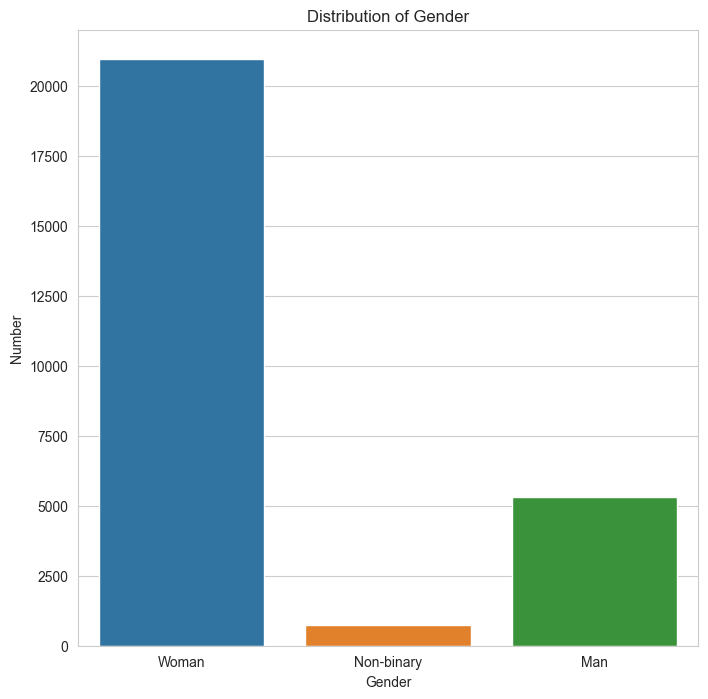

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(gender_df, x = 'Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

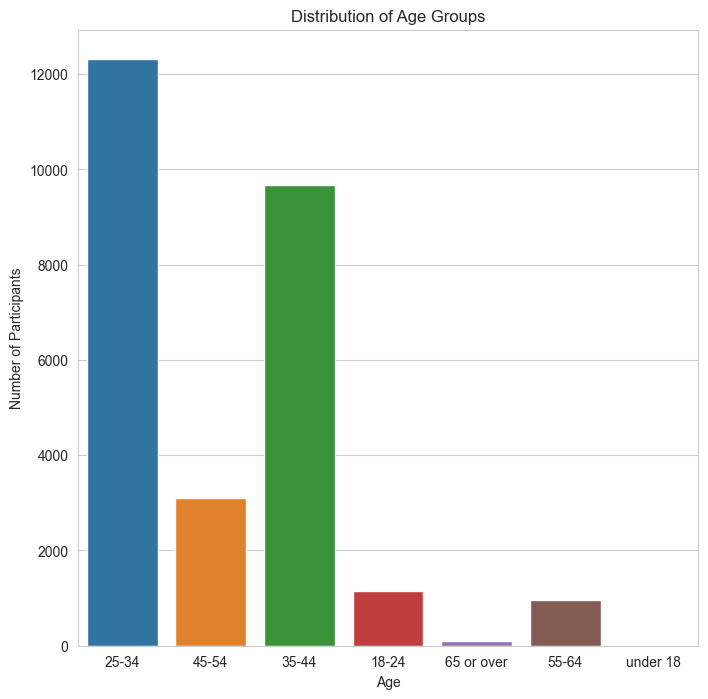

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(salary_df, x = 'Age')
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

In [31]:
cdf = salary_df.groupby('Country')['Country'].count().nlargest(14)
# Convert the resulting Series to a DataFrame
cdf = pd.DataFrame({'Country Count': cdf}).reset_index()


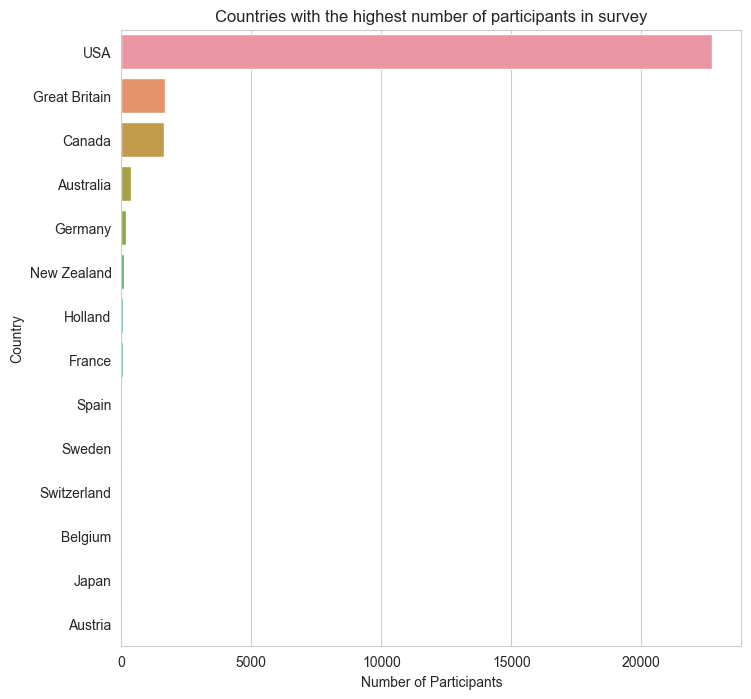

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(cdf, y=cdf['Country'], x=cdf['Country Count'])
plt.title('Countries with the highest number of participants in survey')
plt.xlabel('Number of Participants')
plt.ylabel('Country')
plt.show()


# Demographic Data Analysis

## Age Distribution
- The largest age group in the survey is individuals aged 25-34, followed by those aged 35-44.
- The age distribution declines as the age increases, with a noticeable drop in the 55-64 and 65 or over age groups.
- The age group under 18 has the smallest representation in the survey.

## Gender Distribution
- The survey is predominantly represented by individuals identifying as 'Woman', with a significantly higher count compared to 'Man'.
- 'Non-binary' and 'Other or prefer not to answer' have a lower representation compared to 'Man' and 'Woman'.
- 'Prefer not to answer' has the lowest representation among all gender categories.

## Country Representation
- The majority of respondents are from the USA, indicating a significant focus on the American demographic in the survey.
- 'Great Britain', 'Canada', 'Australia', and 'Germany' also have notable representation, but significantly lower than the USA.

These inferences suggest that the survey primarily represents individuals aged 25-44, with a significant representation of women. Additionally, the data has a strong focus on the USA, but also captures a reasonable representation from other countries, particularly Great Britain, Canada, Australia, and Germany. Further analysis and comparisons can be made based on these demographic segments to draw insights regarding salaries and related trends.


# These are the questions to be answered by the dataset:

- Which industry pays the most?
- What is the average salary for each industry?
- Is there a correlation between age and salary?
- What are the average salaries for various age groups?
- How does salary increase given years of experience?
- How do salaries vary across different industries and locations?
- How do salaries compare for the same role in different locations?
- How does educational level correlate with salary?



###                                                     DATA ANALYSIS

#### 1.What Industry Pays the Most? / What is the Average Salary for Each Industry

In [33]:
# We will calculate this by finding the average salary of each industry

In [34]:
# Calculate the count of entries for each industry
industry_counts = salary_df.groupby('Industry')['Currency_USD'].count()

In [35]:
# Filter out industries with fewer entries than the threshold
reliable_industries = industry_counts[industry_counts >= 100]

In [36]:
reliable_df = salary_df[salary_df['Industry'].isin(reliable_industries.index)].reset_index()

In [37]:
reliable_salary_df = reliable_df.groupby('Industry')['Currency_USD'].mean()

In [38]:
reliable_salary_df = pd.DataFrame(reliable_salary_df).reset_index()
reliable_salary_df.sort_values(by='Currency_USD', ascending=False, inplace=True)


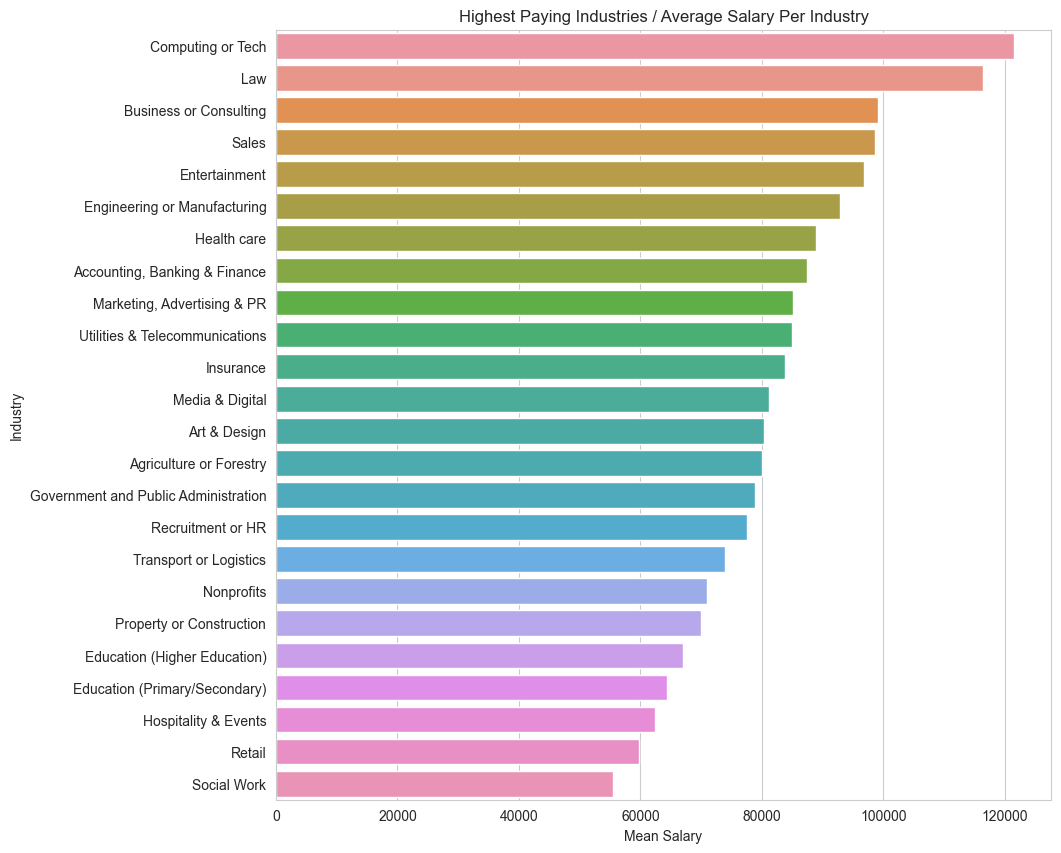

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(data = reliable_salary_df, y='Industry', x='Currency_USD')
plt.title('Highest Paying Industries / Average Salary Per Industry')
plt.xlabel('Mean Salary')
plt.ylabel('Industry')
plt.show()

<p>We are able to Infer from the chart above that Computing and Tech is the highest Paying Industry, Closely Followed by Law</p>

#### 2.Is there a correlation between age and salary

### Explanation:

we are working with a DataFrame named `salary_df` that contains a column labeled 'Age', which currently has age ranges represented as strings (e.g., '25-30', '40-45'). The goal is to process this data to obtain both the minimum and maximum ages and convert them to a numerical format for analysis.

### Explanation:

we are working with a DataFrame named `salary_df` that contains a column labeled 'Age', which currently has age ranges represented as strings (e.g., '25-30', '40-45'). The goal is to process this data to obtain both the minimum and maximum ages and convert them to a numerical format for analysis.

#### Extracting Minimum Age:
- We use `str.split('-')` to split each age range string based on the '-' delimiter, resulting in a list of substrings.
- Next, we use `str.get(0)` to retrieve the first element of each split, which corresponds to the minimum age in the range.

#### Converting to Numeric (Min Age):
- We apply `pd.to_numeric` to convert the extracted minimum age (initially in string format) to a numeric format, enabling numerical operations and calculations.

The resulting numerical values representing the minimum ages are assigned to  new columns named 'Min_Age' and 'Max_Age' in the DataFrame `salary_df`.


In [40]:
age_df = reliable_df.copy()

In [41]:
age_df.groupby('Age')['Age'].count()

Age
18-24          1041
25-34         11333
35-44          8884
45-54          2831
55-64           862
65 or over       82
under 18          8
Name: Age, dtype: int64

In [42]:
# the rows where to age is classified as under 18 are too small we are going to have to drop them
age_df = age_df[age_df['Age'] != 'under 18']

In [43]:
age_df['Max_Age'] = age_df['Age']

In [44]:
# Resign the indefinite values
age_df.loc[age_df['Max_Age'] == '65 or over', 'Max_Age'] = 65
age_df.loc[age_df['Max_Age'] == '18-24', 'Max_Age'] = 20

In [45]:
# Split the 'Age' string and extract the lower and higher end of the range
age_df['Max_Age'] = pd.to_numeric(age_df['Max_Age'].str.split('-').str.get(0)).fillna(age_df['Max_Age'])
age_df['Max_Age'] = age_df['Max_Age'].astype('int')


In [46]:
# Calculate Correlation
corr = age_df['Max_Age'].corr(age_df['Currency_USD'])
corr


0.12904885566198543

<p>The correlation coefficient of approximately 0.129 suggests that there is a weak positive correlation between age and annual salary. In other words, as age increases, there is a slight tendency for annual salary to also increase, but the relationship is not very strong. This means that while older individuals may, on average, earn slightly higher salaries than younger individuals, age alone is not a strong predictor of salary, and other factors likely play a more significant role in determining annual earnings.</p>

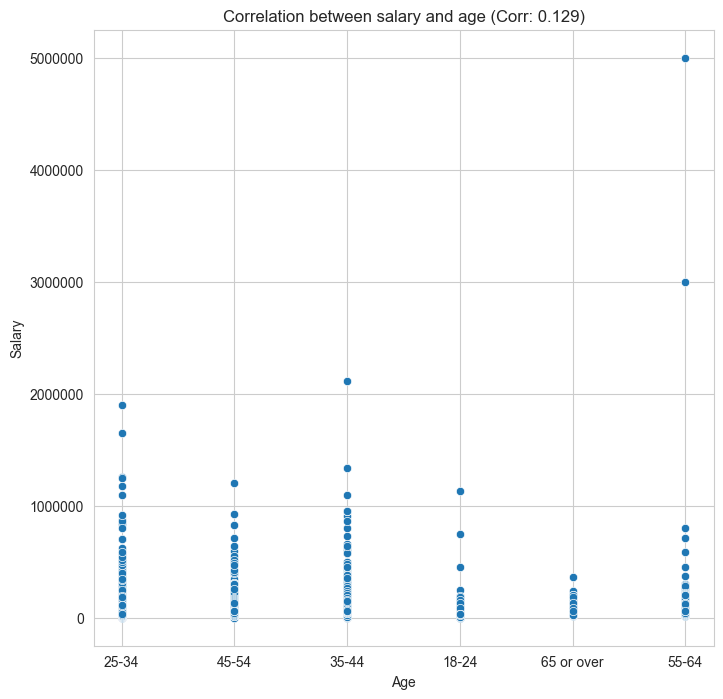

In [47]:
plt.figure(figsize=(8, 8))
sns.set_style('whitegrid')
sns.scatterplot(x='Age', y='Currency_USD', data=age_df)
plt.title(f'Correlation between salary and age (Corr: {corr:.3f})')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

#### What are the average salaries for various age groups?

In [48]:
average_salary_df = age_df.groupby('Age')['Currency_USD'].mean()
average_salary_df = pd.DataFrame(average_salary_df).reset_index()
# reliable_salary_df.sort_values(by='Currency_USD', ascending=False, inplace=True)

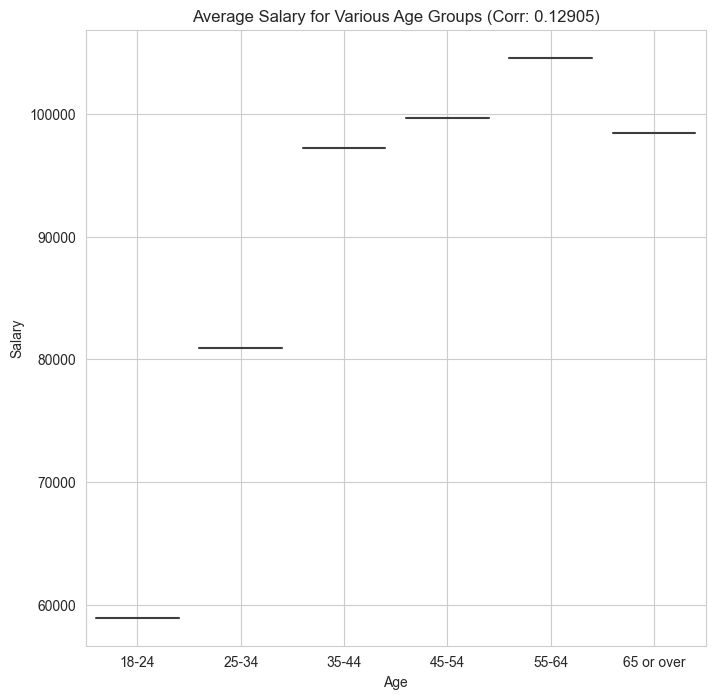

In [49]:
plt.figure(figsize=(8, 8))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='Age', y='Currency_USD', data=average_salary_df)
plt.title(f'Average Salary for Various Age Groups (Corr: {corr:.5f})')
custom_x_ticks = [17,25,35,45,55,65]
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

<P>The Average salary chart however suggests a trend that the older you get, the higher your salary becomes, showing a slight decline at the ages of 65 and over</P>

#### How does salary increase given years of experience?

In [50]:
# lets take a look at the unique values in the yoe column
reliable_df['YOE(Field)'].unique()

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [51]:
# lets create a df to contain the everage salaries 
exp_df = reliable_df.groupby('YOE(Field)')['Currency_USD'].mean()
exp_df = pd.DataFrame(exp_df).reset_index()

In [52]:
# calculate the log value
reliable_df['Log_Salary'] = np.log(reliable_df['Currency_USD'])

In [53]:
# extract the values from the yoe column so we can sort the df
exp_df['Years'] = exp_df['YOE(Field)'].str.extract('(\d+)').astype(float)
exp_df = exp_df.sort_values('Years')
exp_df = exp_df.reset_index(drop=True)

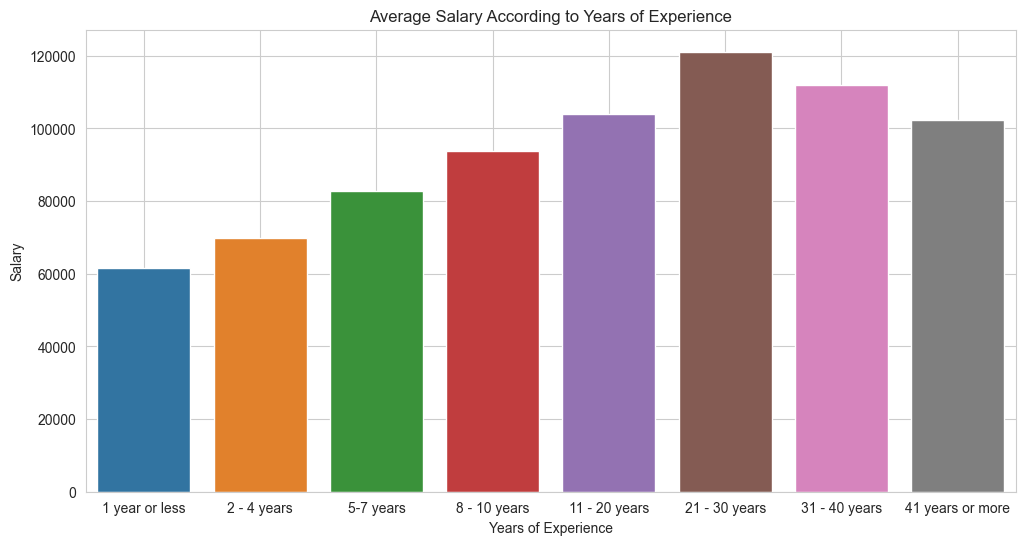

In [55]:
plt.figure(figsize=(12, 6))
# plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Salary According to Years of Experience')
sns.barplot(x='YOE(Field)', y='Currency_USD', data=exp_df)
# plt.ticklabel_format(style='plain', axis='y')
# plt.xticks(order)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

The analysis of annual salaries by experience level reveals intriguing insights into compensation trends. Employees with varying years of experience exhibit distinct average annual salaries, shedding light on how experience impacts earning potential.

Starting with the least experienced individuals, those with "1 year or less" experience have an average annual salary of approximately $61,500 USD. This marks the initial point of the salary progression, reflecting the compensation at the outset of one's career.

Moving up the experience ladder, employees with "2-4 years" and "5-7 years" experience demonstrate a noticeable increase in their average annual salaries, exceeding $69,800 USD and $82,800 USD, respectively. This suggests a rewarding trend as professionals accumulate a few years of experience.

As the career span extends, a more substantial increase in average salary is observed for those with "8-10 years" experience, reaching close to $93,800 USD. This bracket represents a critical juncture where expertise and responsibilities significantly grow, impacting compensation accordingly.

Continuing the trajectory, professionals with "11-20 years" experience surpass the $100,000 USD threshold, reflecting a substantial leap in compensation. This range encapsulates a significant portion of mid-career professionals, demonstrating the financial rewards that come with an extended tenure in the field.

For the veteran professionals with "21-30 years" and "31-40 years" experience, the average annual salaries soar well above $120,000 USD and $110,000 USD, respectively. This signifies the substantial value attributed to their extensive expertise and long-term contributions to their respective industries.

Lastly, the "41 years or more" category represents the apex of the salary progression, with an average annual salary of approximately $102,400 USD. These professionals have dedicated a substantial portion of their lives to their careers, and their compensation reflects their wealth of experience and expertise.

In summary, the analysis underscores a clear upward trajectory in annual salaries with increasing experience levels. This trend reaffirms the widely recognized notion that experience significantly impacts compensation, making it a pivotal factor for professionals to consider in their career growth and financial planning.
ance.</p>

#### How do salaries vary across different industries and locations?

In [131]:
reliable_df.groupby('Job title')['Job title'].count().nlargest()

Job title
Software Engineer           279
Project Manager             200
Senior Software Engineer    193
Director                    165
Teacher                     145
Name: Job title, dtype: int64

In [227]:
se_df = reliable_df[reliable_df['Job title'] == 'Software Engineer']

In [232]:
se_df.groupby('Country')['Country'].count()

Country
Canada            11
Germany            6
Great Britain     14
USA              229
Name: Country, dtype: int64

We can see that some of the countries have only 1 or 2 entries, and are not so useful for our analysis.

In [229]:
se_counts  = se_df.groupby('Country')['Currency_USD'].count()

In [230]:
# Filter out industries with fewer entries than the threshold
e_df = se_counts[se_counts >= 6]

In [231]:
se_df = se_df[se_df['Country'].isin(e_df.index)].reset_index(drop=True)

In [233]:
# Calculate the average salaries of all countries
se_df = se_df.groupby('Country')['Currency_USD'].mean().reset_index()

In [234]:
# the data
se_df = se_df.sort_values(by='Currency_USD', ascending=False)
se_df

,Country,Currency_USD
3,USA,145851.698690
1,Germany,92198.333333
0,Canada,84420.909091
2,Great Britain,70622.100000


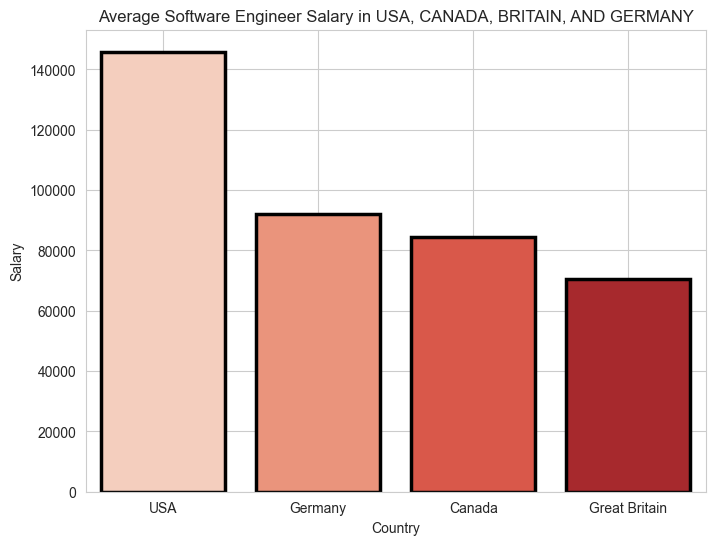

In [261]:
plt.figure(figsize=(8, 6))
plt.title('Average Software Engineer Salary in USA, CANADA, BRITAIN, AND GERMANY')
sns.barplot(x='Country', y='Currency_USD', data=se_df, palette='Reds',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [241]:
pm_df = reliable_df[reliable_df['Job title'] == 'Product Manager']

In [243]:
pm_df.groupby('Country')['Currency_USD'].count()

Country
Australia         1
Canada           10
Germany           1
Great Britain     7
Holland           1
Singapore         1
Thailand          1
USA              97
Name: Currency_USD, dtype: int64

In [244]:
pm_df = pm_df[pm_df.groupby('Country')['Currency_USD'].transform('count') >= 2]

In [259]:
pm_df = pm_df.groupby('Country')['Currency_USD'].mean().reset_index().sort_values(by='Currency_USD',ascending=False)

In [260]:
pm_df

,Country,Currency_USD
2,USA,120634.494845
1,Great Britain,89705.142857
0,Canada,68413.000000


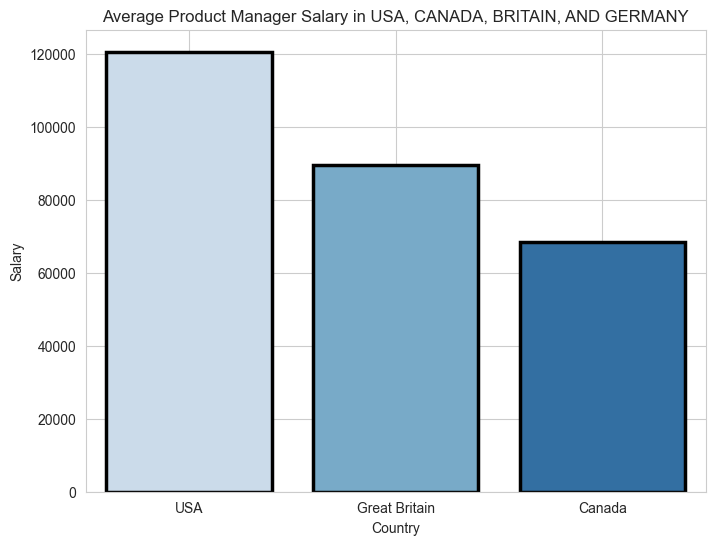

In [262]:
plt.figure(figsize=(8, 6))
plt.title('Average Product Manager Salary in USA, CANADA, BRITAIN, AND GERMANY')
sns.barplot(x='Country', y='Currency_USD', data=pm_df, palette='Blues',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### How do salaries vary across different industries and locations?

In [56]:
# let us check the countries with the highest number of entries
reliable_df.groupby('Country')['Country'].count().nlargest(9)

Country
USA              20821
Great Britain     1553
Canada            1509
Australia          344
Germany            172
New Zealand        112
Holland             76
France              57
Spain               37
Name: Country, dtype: int64

In [57]:
reliable_df.groupby('Industry')['Industry'].count().nlargest()

Industry
Computing or Tech                       4560
Education (Higher Education)            2397
Nonprofits                              2379
Government and Public Administration    1856
Health care                             1849
Name: Industry, dtype: int64

So for the Purposes of this Question we will be working with the 3 largest Countries and the 3 Largest industries

In [65]:
computing_df = reliable_df[(reliable_df['Industry']=='Computing or Tech') & (reliable_df['Country'].isin(['USA','Great Britain','Canada','Germany']))]

In [66]:
computing_df = computing_df.groupby('Country')['Currency_USD'].mean()

In [75]:
computing_df = computing_df.reset_index()

In [120]:
computing_df.sort_values(by='Currency_USD', ascending=False)

,Country,Currency_USD
3,USA,130005.959596
1,Germany,99042.098592
2,Great Britain,83927.956091
0,Canada,79548.838448


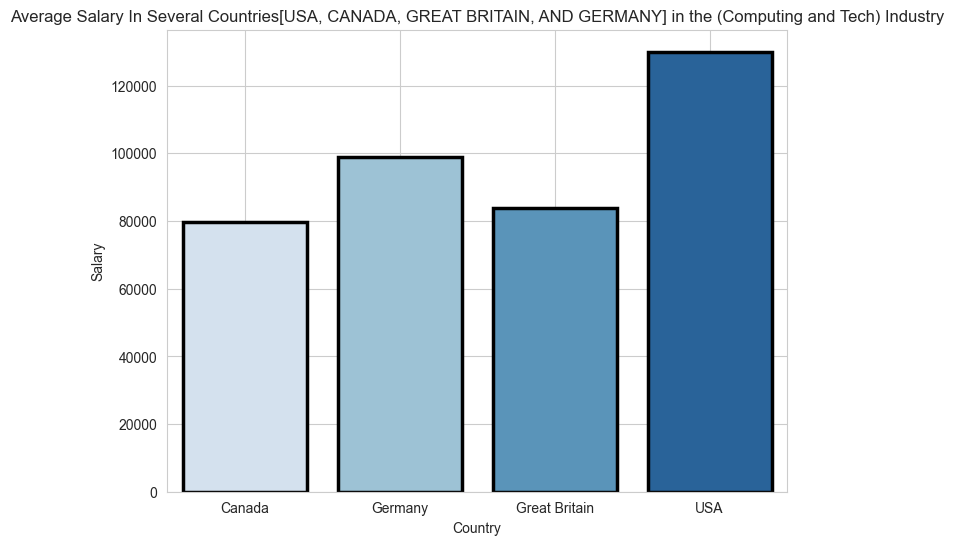

In [78]:
plt.figure(figsize=(8, 6))
plt.title('Average Salary In Several Countries[USA, CANADA, GREAT BRITAIN, AND GERMANY] in the (Computing and Tech) Industry')
sns.barplot(x='Country', y='Currency_USD', data=computing_df, palette='Blues',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [80]:
education_df = reliable_df[(reliable_df['Industry'] == 'Education (Higher Education)') & (reliable_df['Country'].isin(['USA','Great Britain','Canada','Germany']))]

In [83]:
education_df  = education_df.groupby('Country')['Currency_USD'].mean().reset_index()

In [119]:
education_df.sort_values(by='Currency_USD', ascending=False)

,Country,Currency_USD
3,USA,68818.397254
1,Germany,64643.247500
0,Canada,58863.141233
2,Great Britain,48016.555966


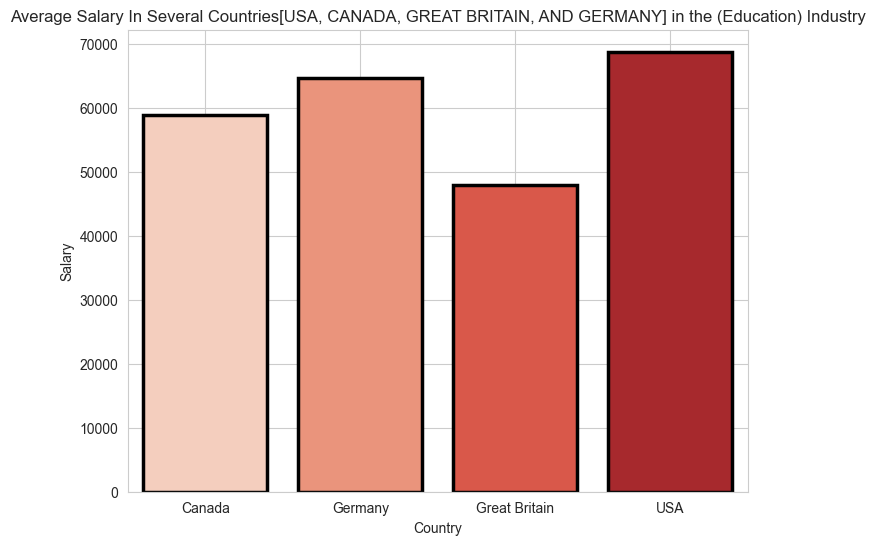

In [87]:
plt.figure(figsize=(8, 6))
plt.title('Average Salary In Several Countries[USA, CANADA, GREAT BRITAIN, AND GERMANY] in the (Education) Industry')
sns.barplot(x='Country', y='Currency_USD', data=education_df, palette='Reds',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [88]:
npo_df = reliable_df[(reliable_df['Industry'] == 'Nonprofits') & (reliable_df['Country'].isin(['USA','Great Britain','Canada','Germany']))]

In [89]:
npo_df  = npo_df.groupby('Country')['Currency_USD'].mean().reset_index()

In [123]:
npo_df.sort_values(by='Currency_USD', ascending=False)

,Country,Currency_USD
3,USA,73423.164051
1,Germany,61525.000000
0,Canada,49983.293729
2,Great Britain,46581.450000


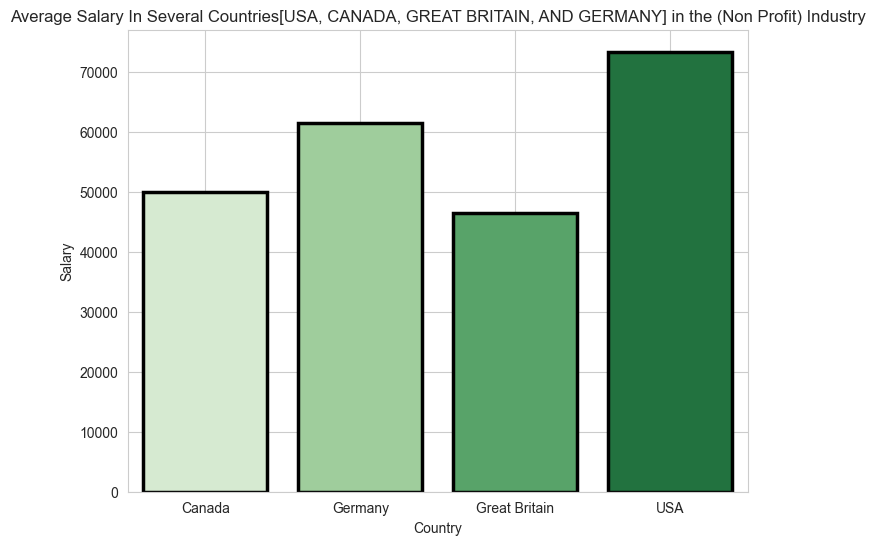

In [122]:
plt.figure(figsize=(8, 6))
plt.title('Average Salary In Several Countries[USA, CANADA, GREAT BRITAIN, AND GERMANY] in the (Non Profit) Industry')
sns.barplot(x='Country', y='Currency_USD', data=npo_df, palette='Greens',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [98]:
health_df = reliable_df[(reliable_df['Industry'] == 'Health care') & (reliable_df['Country'].isin(['USA','Great Britain','Canada','Germany']))]

In [99]:
health_df  = health_df.groupby('Country')['Currency_USD'].mean().reset_index()

In [124]:
health_df.sort_values(by='Currency_USD', ascending=False)

,Country,Currency_USD
3,USA,93063.683064
2,Great Britain,56057.503191
0,Canada,55629.146087
1,Germany,48978.180000


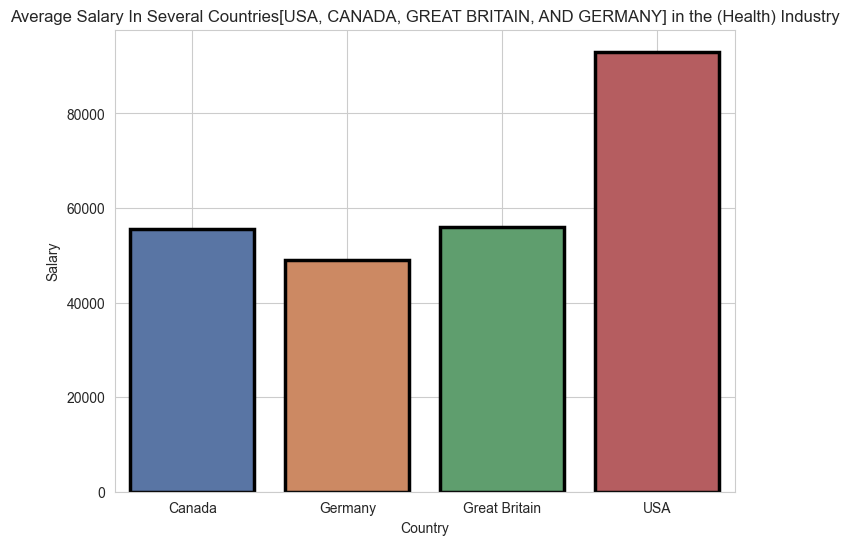

In [102]:
plt.figure(figsize=(8, 6))
plt.title('Average Salary In Several Countries[USA, CANADA, GREAT BRITAIN, AND GERMANY] in the (Health) Industry')
sns.barplot(x='Country', y='Currency_USD', data=health_df, palette='deep',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [109]:
gov_df = reliable_df[(reliable_df['Industry']=='Government and Public Administration') & (reliable_df['Country'].isin(['USA','Great Britain','Canada','Germany']))]

In [111]:
gov_df  = gov_df.groupby('Country')['Currency_USD'].mean().reset_index()

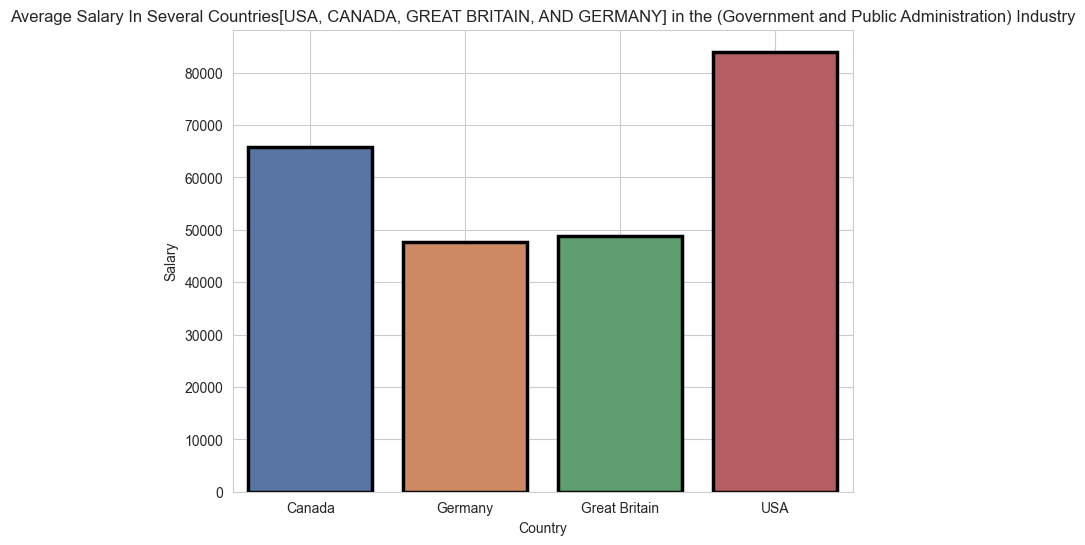

In [112]:
plt.figure(figsize=(8, 6))
plt.title('Average Salary In Several Countries[USA, CANADA, GREAT BRITAIN, AND GERMANY] in the (Government and Public Administration) Industry')
sns.barplot(x='Country', y='Currency_USD', data=gov_df, palette='deep',linewidth=2.5, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

From the provided data on salaries in different countries within specific industries (computing/tech, healthcare, and education), we can observe the following key points:

Salary Variation by Country:
- In the computing/tech industry, the USA has the highest average salary among the listed countries, followed by Great Britain, Germany, and Canada.
- In the Non Profit, the USA  also has the highest average salary among the listed countries, followed by Germany, Canada, then Great Britain
- For the healthcare industry, the USA also has the highest average salary, followed by Great Britain, Canada, and Germany.
- In the education industry, again, the USA leads in terms of the highest average salary, followed by Germany, Great Britain, and Canada.
  
 In summary, the data shows that the USA tends to offer the highest average salaries across all industries

#### How does educational level correlate with salary?

In [273]:
reliable_df.groupby('Edu_Level_Highest')['Currency_USD'].count()

Edu_Level_Highest
College degree                        12192
High School                             559
Master's degree                        7889
No Formal Education                     145
PhD                                    1175
Professional degree (MD, JD, etc.)     1238
Some college                           1843
Name: Currency_USD, dtype: int64

The Sample Size of the 'No formal Education' Group is too small when compared to the others, so we will drop the column

In [292]:
edu_lvl = reliable_df[reliable_df['Edu_Level_Highest'] != 'No Formal Education']

In [297]:
edu_lvl = edu_lvl.groupby('Edu_Level_Highest')['Currency_USD'].mean().reset_index()

In [303]:
edu_lvl = edu_lvl.sort_values(by='Currency_USD',ascending=False)

In [304]:
edu_lvl

,Edu_Level_Highest,Currency_USD
4,"Professional degree (MD, JD, etc.)",133829.915670
3,PhD,103428.295821
2,Master's degree,90462.961410
0,College degree,84505.836680
5,Some college,75003.558285
1,High School,72156.437066


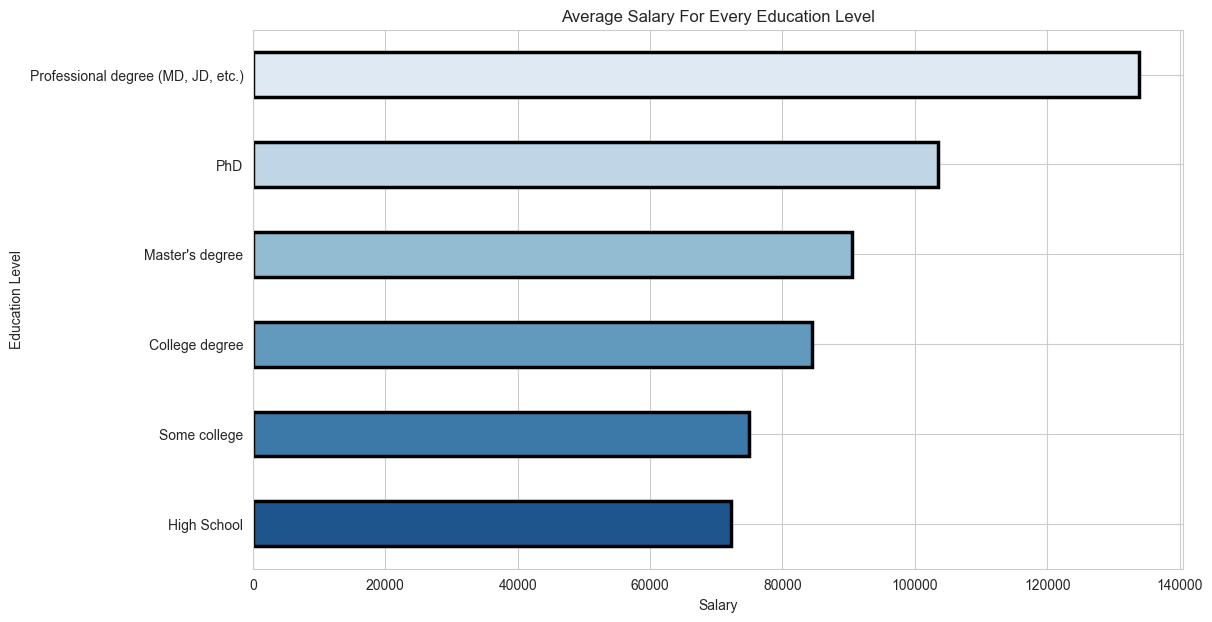

In [313]:
plt.figure(figsize = (12,7))
plt.title('Average Salary For Every Education Level')
sns.barplot(data=edu_lvl, y='Edu_Level_Highest', x='Currency_USD',palette='Blues',linewidth=2.5, edgecolor='black',width = 0.5)
plt.xlabel('Salary')
plt.ylabel('Education Level')
plt.grid(True)
plt.show()

Highest Salary for Professional Degrees:
Professionals with degrees such as MD, JD, etc. have the highest average salary, approximately 133,830 USD, indicating a strong correlation between these specialized professional degrees and higher income.

Individuals with a Ph.D. attain the second highest average salary, around 103,428 USD, showcasing the value and recognition of doctorate-level education in the professional sphere.

Master's and College Degree Holders:
Professionals with a Master's degree and College degree follow, earning an average salary of approximately 90,463 USD and 84,506 USD respectively. These levels of education remain pivotal for competitive earnings.

Some College and High School Graduates:
Individuals with some college education earn an average salary of around 75,004 USD, while those with a high school diploma have an average salary of about 72,156 USD. These education levels demonstrate a notable difference in average earnings compared to higher degree holders.

In summary, the data underscores a clear positive correlation between the level of education attained and the corresponding average salary. Higher degrees, especially professional and doctoral degrees, tend to yield significantly higher earnings, reflecting the importance of advanced education in the job market and its impact on income levels.